In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import urllib2
import datetime, time
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
def check_two_pointer(json_obj):
    """
    Checks whether given json object's action is two point shot
    """
    return json_obj["AC"] == "P2"

def check_three_pointer(json_obj):
    """
    Checks whether given json object's action is three point shot
    """
    return json_obj["AC"] == "P3"

def get_all_important_feats(json_obj, quarter):
    """
    Retrieves all important data from each json object play, some that are of interest to us are:
    AC - action,
    SX - x coordinate
    SY - y coordinate
    SU - Shot result
    Time - time left in quarter
    QT : QUarter
    Result is returned as dictionary, in format of: {AC: "", SX: x, SY: y, SU: 1|0}
    """
    dict_play = {}
    dict_play["AC"] = json_obj["AC"]
    dict_play["SX"] = int(json_obj["SX"])
    dict_play["SY"] = int(json_obj["SY"])
    if json_obj["SU"] == "+":
        dict_play["FGM"] = 1
    else:
        dict_play["FGM"] = 0
    x = time.strptime(json_obj['Time'],'%M:%S')
    dict_play["TIME"] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    dict_play["QT"] = quarter
    return dict_play

In [3]:
def get_data_Hungary():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C01_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C01_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C01_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C01_Q4_JSON.json"
    ]

def get_data_Romania():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C06_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C06_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C06_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C06_Q4_JSON.json"
    ]

def get_data_Montenegro():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C08_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C08_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C08_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C08_Q4_JSON.json",
    ]

def get_data_Spain():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C11_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C11_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C11_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C11_Q4_JSON.json"
    ]

def get_data_Czechia():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C13_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C13_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C13_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400C13_Q4_JSON.json"
    ]

In [6]:
def get_data_Latvia():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D02_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D02_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D02_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D02_Q4_JSON.json"
    ]

def get_data_Russia():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D05_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D05_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D05_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D05_Q4_JSON.json"
    ]

def get_data_Turkey():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D09_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D09_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D09_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D09_Q4_JSON.json",
    ]

def get_data_Great_Britain():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D11_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D11_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D11_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D11_Q4_JSON.json"
    ]

def get_data_Belgium():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D14_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D14_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D14_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400D14_Q4_JSON.json"
    ]

In [14]:
def get_plays_for_player(quarter_urls, player_id):
    plays_in_game = []
    for index, quarter_url in enumerate(quarter_urls):
        quarter = index+1
        response = urllib2.urlopen(quarter_url)
        data = json.loads(response.read())
        plays = data["content"]["full"]["Items"]
        for play in plays:
            if "C1" in play and play["C1"] == player_id:
                if check_two_pointer(play) or check_three_pointer(play):
                    if 'SX' in play:
                        plays_in_game.append(get_all_important_feats(play, quarter))
    return plays_in_game

In [19]:
bojan_plays = []
bojan_plays.extend(get_plays_for_player(get_data_Hungary(), "BKM400C01-47907"))
bojan_plays.extend(get_plays_for_player(get_data_Romania(), "BKM400C06-47907"))
bojan_plays.extend(get_plays_for_player(get_data_Montenegro(), "BKM400C08-47907"))
bojan_plays.extend(get_plays_for_player(get_data_Spain(), "BKM400C11-47907"))
bojan_plays.extend(get_plays_for_player(get_data_Czechia(), "BKM400C13-47907"))
bojan_data_frame = pd.DataFrame(bojan_plays)

bogdan_plays = []
bogdan_plays.extend(get_plays_for_player(get_data_Latvia(), "BKM400D02-85119"))
bogdan_plays.extend(get_plays_for_player(get_data_Russia(), "BKM400D05-85119"))
bogdan_plays.extend(get_plays_for_player(get_data_Turkey(), "BKM400D09-85119"))
bogdan_plays.extend(get_plays_for_player(get_data_Great_Britain(), "BKM400D11-85119"))
bogdan_plays.extend(get_plays_for_player(get_data_Belgium(), "BKM400D14-85119"))
bogdan_data_frame = pd.DataFrame(bogdan_plays)

In [50]:
max(bojan_data_frame.SX)

267

In [89]:
max(bogdan_data_frame.SY)

255

In [66]:
bojan_copy = bojan_data_frame.copy()
bojan_copy.SX = 281 - bojan_copy.SX # magic numbersss
bojan_copy.SX = bojan_copy.SX/float(max(bojan_copy.SX)) * 740 # more magicc
bojan_copy.SY = bojan_copy.SY/float(max(bojan_copy.SY)) * 450 # magic
bojan_makes = bojan_copy[bojan_copy.FGM==1]
bojan_misses = bojan_copy[bojan_copy.FGM==0]

In [100]:
bogdan_copy = bogdan_data_frame.copy()
bogdan_copy.SX = 281 - bogdan_copy.SX # magic numbersss
bogdan_copy.SX = bogdan_copy.SX/float(max(bogdan_copy.SX)) * 740 # more magicc
bogdan_copy.SY = bogdan_copy.SY/float(260) * 700 # magic
bogdan_makes = bogdan_copy[bogdan_copy.FGM==1]
bogdan_misses = bogdan_copy[bogdan_copy.FGM==0]

In [101]:
img_2 = plt.imread("../Data/basket_image_fiba/basket_image_color.png")

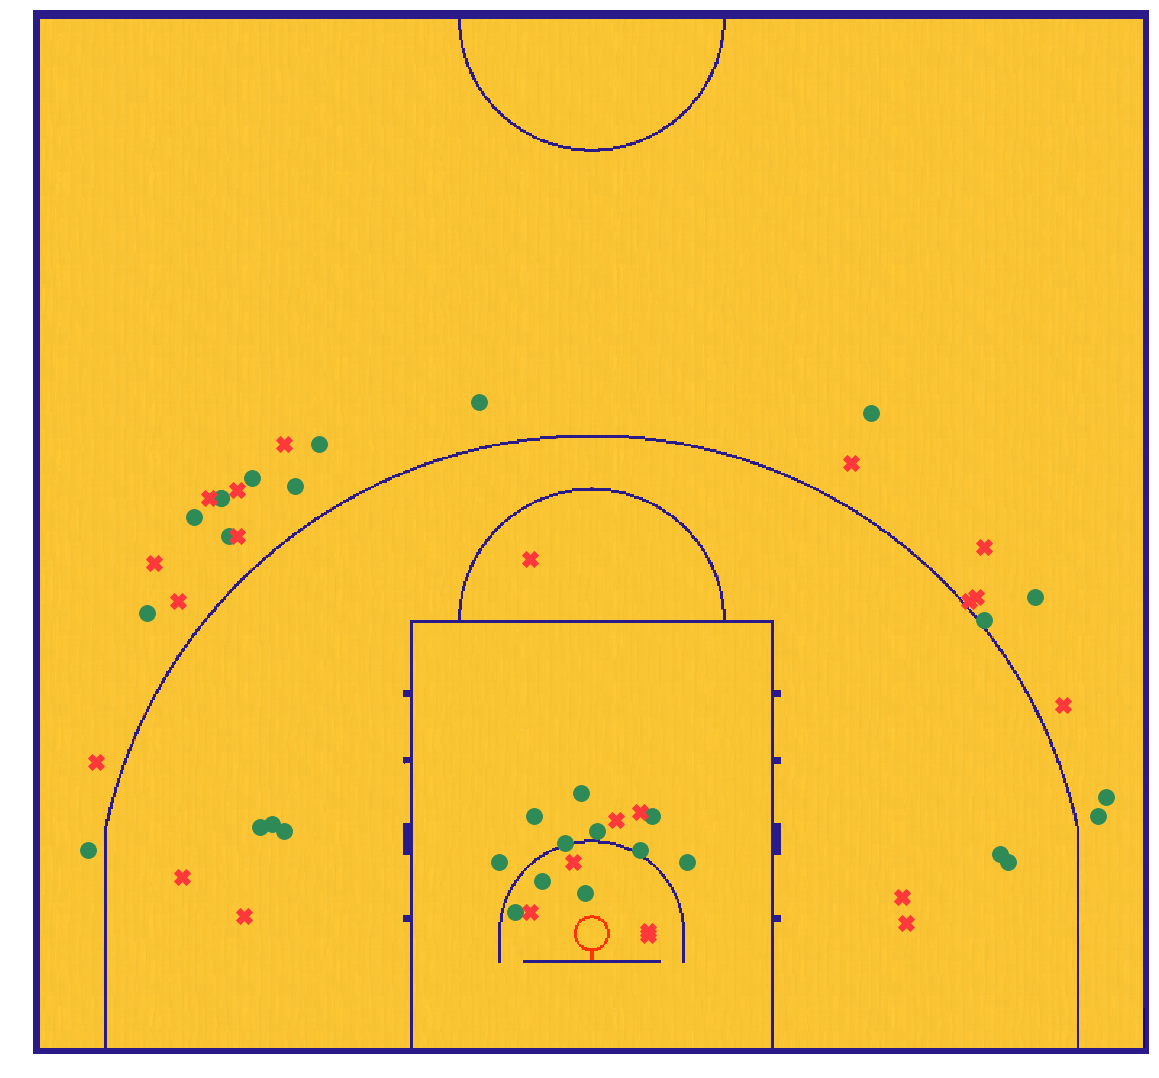

In [105]:
plt.figure(figsize=(20, 20))
plt.imshow(img_2, extent=[0, 770, 0, 720])
plt.axis('off')
plt.scatter(bojan_makes.SX, 
            bojan_makes.SY, 
            c=[46 /256.,139/256.,87/256.], marker='o', s=250)
plt.scatter(bojan_misses.SX, 
            bojan_misses.SY, 
            c=[1.0, 0.22, 0.231], marker='X', s=250)

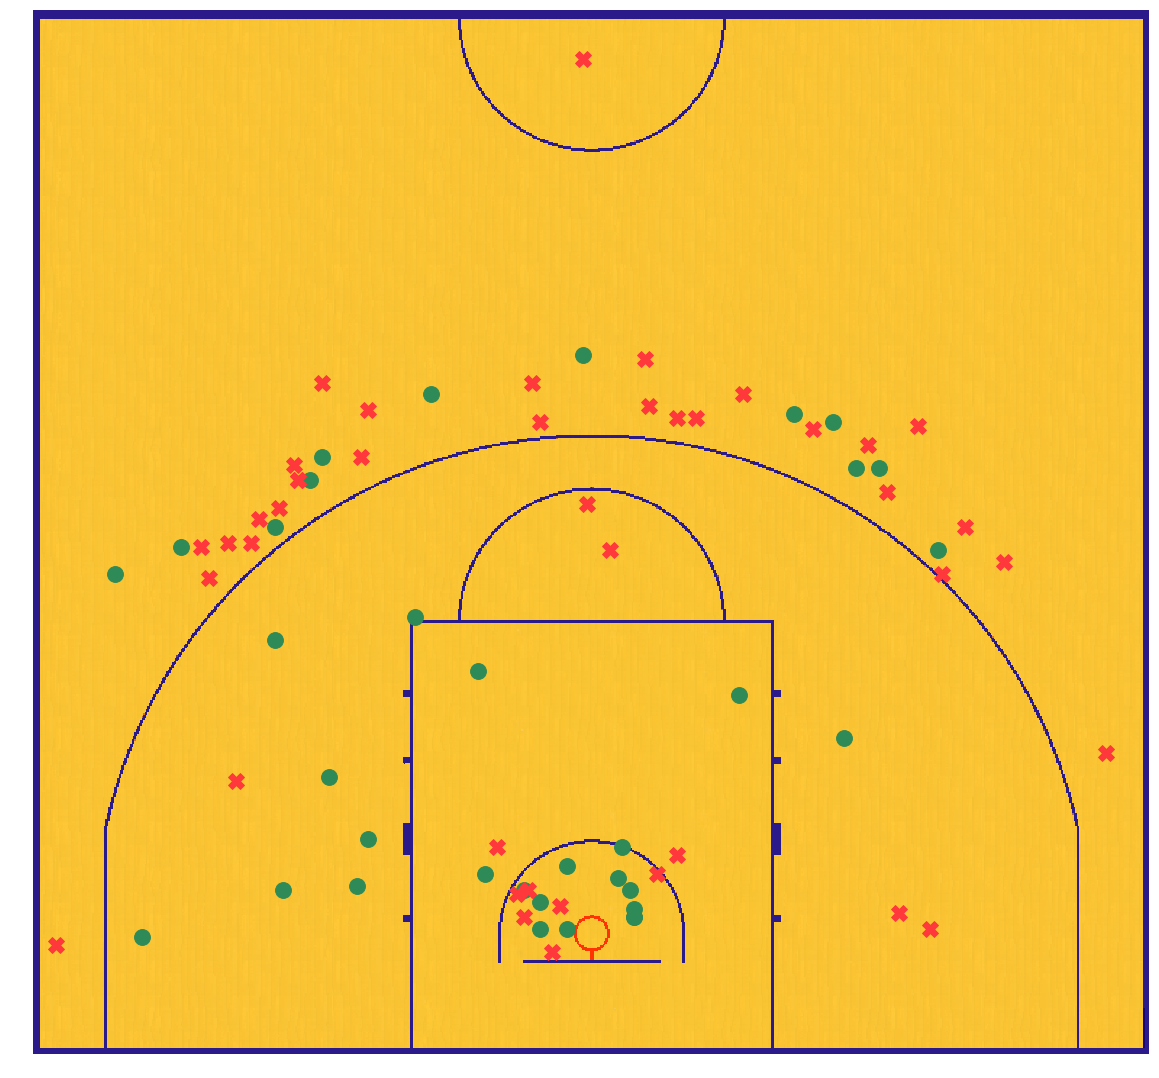

In [106]:
plt.figure(figsize=(20, 20))
plt.imshow(img_2, extent=[0, 770, 0, 720])
plt.axis('off')
plt.scatter(bogdan_makes.SX, 
            bogdan_makes.SY, 
            c=[46 /256.,139/256.,87/256.], marker='o', s=250)
plt.scatter(bogdan_misses.SX, 
            bogdan_misses.SY, 
            c=[1.0, 0.22, 0.231], marker='X', s=250)